In [24]:
import torch
import numpy

import environment 
import importlib
importlib.reload(environment)

<module 'environment' from '/Users/alicia/Desktop/Research/fairness_gym/environment.py'>

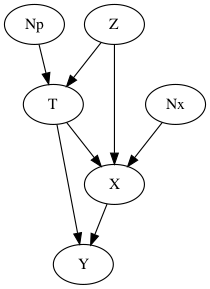

In [19]:
sem = environment.SEM({"Np": None, "Z": None, "Nx": None, "T": ["Np", "Z"], "X": ["Z", "T", "Nx"], "Y": ["T", "X"]})
# sem.summary()
sem.draw()

#### Specify the structural equations

In [20]:
# All vertices
print("All vertices: ", sem.vertices())
# Root vertices => provide distributions
print("Roots: ", sem.roots())
# Non root vertices => provide equations making use of all parents
print("Non-roots: ", sem.non_roots())

All vertices:  ['Np', 'Z', 'Nx', 'T', 'X', 'Y']
Roots:  ['Np', 'Z', 'Nx']
Non-roots:  ['T', 'X', 'Y']


In [22]:
#root variables are random numbers
for v in sem.roots():
    sem.attach_equation(v, lambda n: torch. randn(n,1))

# non-root variables are linear functions of their parents
sem.attach_equation("T", lambda data: 1*data['Np'] + 1*data['Z'] )
sem.attach_equation("X", lambda data: 1*data['T'] + 1*data['Nx'])
sem.attach_equation("Y", lambda data: 1*data['T'] + 1*data['X']+1*data['Z'])

Attaching equation to vertex Np... DONE
Attaching equation to vertex Z... DONE
Attaching equation to vertex Nx... DONE
Attaching equation to vertex T... DONE
Attaching equation to vertex X... DONE
Attaching equation to vertex Y... DONE


### sample from the SEM models

In [25]:
sample = sem.sample(1000)

Sample vertex Nx... DONE
Sample vertex Z... DONE
Sample vertex Np... DONE
Sample vertex T... DONE
Sample vertex X... DONE
Sample vertex Y... DONE
